#Classify images of clothing

In [78]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [53]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
len(train_labels)

60000

In [57]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [58]:
test_images.shape

(10000, 28, 28)

In [59]:
len(test_labels)

10000

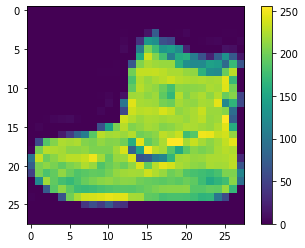

In [60]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
train_images = train_images / 255.0

test_images = test_images / 255.0

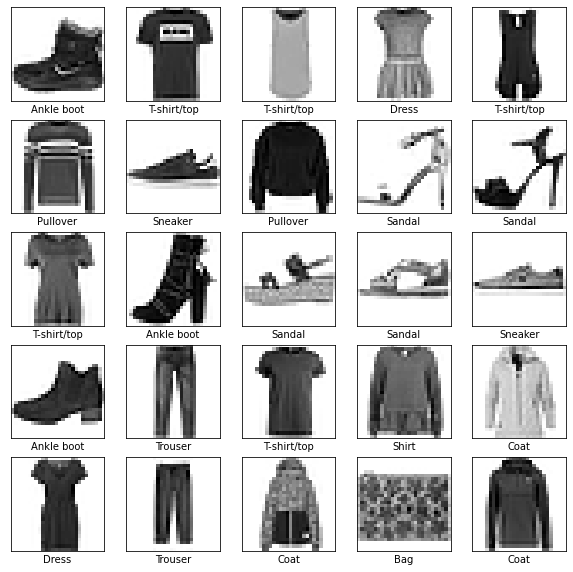

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [63]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8909


In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n테스트 정확도:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8665

테스트 정확도: 0.8665000200271606


In [67]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [68]:
predictions = probability_model.predict(test_images)

In [69]:
predictions[0]

array([6.8710910e-06, 3.0866212e-07, 8.2371362e-06, 1.7837004e-06,
       2.7982444e-06, 1.0662704e-01, 6.2465297e-06, 7.4170806e-02,
       1.9931000e-04, 8.1897670e-01], dtype=float32)

In [70]:
np.argmax(predictions[0])

9

In [113]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


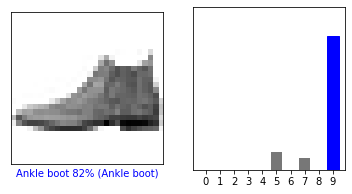

In [114]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

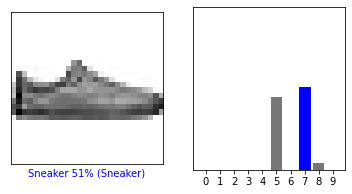

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot the first X test images, their predicted labels, and the true labels.    
Color correct predictions in blue and incorrect predictions in red.

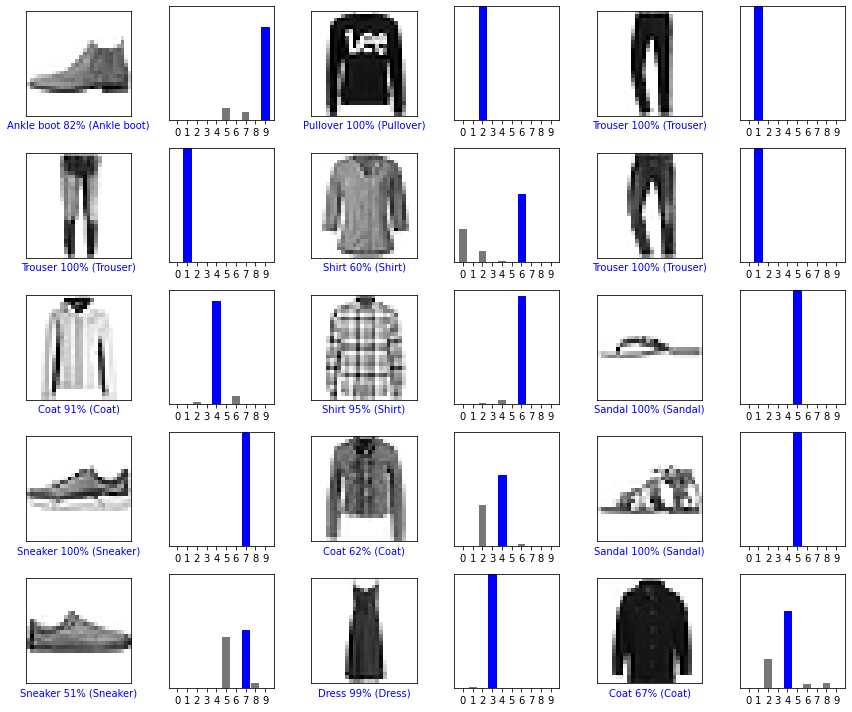

In [87]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

### Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [88]:
# Grab an image from the test dataset.
img = test_images[i]

print(img.shape)

(28, 28)


Add the image to a batch where it's the only member.

In [94]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [95]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.97793567e-03 1.46996035e-05 2.50796318e-01 1.05626401e-04
  6.74763322e-01 6.46763088e-10 2.89964620e-02 1.15392522e-10
  4.33455408e-02 2.51120069e-10]]


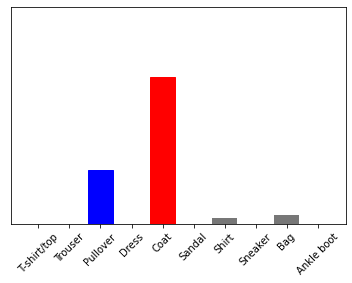

In [96]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists - one list for each image in the batch of data. Grab the predictions for our(only) image in the batch.

In [116]:
np.argmax(predictions_single[0])

4

And the model predicts a label as expected.